In [535]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

import itertools
from sklearn import metrics
from sklearn.metrics import pairwise_distances

from sklearn.cluster import AffinityPropagation
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import SpectralClustering

In [607]:
boston = pd.read_csv("https://raw.githubusercontent.com/llimllib/bostonmarathon/master/results/2014/results.csv", error_bad_lines=False)

In [204]:
boston.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [537]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31984 entries, 0 to 31983
Data columns (total 21 columns):
10k          31984 non-null object
name         31984 non-null object
division     31984 non-null int64
25k          31984 non-null object
gender       31984 non-null object
age          31984 non-null int64
official     31984 non-null float64
bib          31984 non-null object
genderdiv    31984 non-null int64
ctz          1244 non-null object
35k          31984 non-null object
overall      31984 non-null int64
pace         31984 non-null float64
state        29408 non-null object
30k          31984 non-null object
5k           31984 non-null object
half         31984 non-null object
20k          31984 non-null object
country      31984 non-null object
city         31983 non-null object
40k          31984 non-null object
dtypes: float64(2), int64(4), object(15)
memory usage: 5.1+ MB


In [539]:
boston.loc[(boston['10k'] == '-') | (boston['25k'] == '-') | (boston['35k'] == '-') | (boston['30k'] == '-') | 
           (boston['5k'] == '-') | (boston['20k'] == '-') | (boston['40k'] == '-') | (boston['overall'] == '-')].head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
836,38.28,"Moosbrugger, Michael",2701,100.75,M,32,194.87,891,4672,NaN,...,5252,7.43,NaN,124.67,-,83.70,79.12,AUT,Dornbirn,181.07
1333,44.55,"Thoman, Dave",2692,112.18,M,28,194.68,1487,4633,NaN,...,5206,7.43,NY,136.08,-,94.65,89.68,USA,Albany,184.47
1682,44.07,"Boden, Jeffrey G",3219,-,M,38,206.72,1905,6647,NaN,...,8284,7.90,FL,140.97,21.47,96.22,91.02,USA,Coral Gables,195.22
2968,42.37,"Koeppe, Torsten",216,106.72,M,49,182.07,3385,2545,GER,...,2700,6.95,MA,-,21.23,89.57,84.90,USA,Andover,171.75
3189,-,"Haushalter, Jeff",647,-,M,47,195.82,3622,4815,NaN,...,5463,7.48,GA,-,-,-,-,USA,Atlanta,184.62


In [540]:
len(boston.loc[(boston['10k'] == '-') | (boston['25k'] == '-') | (boston['35k'] == '-') | (boston['30k'] == '-') | 
               (boston['5k'] == '-') | (boston['20k'] == '-') | (boston['40k'] == '-') | (boston['official'] == '-')])

297

In [541]:
len(boston.loc[(boston['10k'] == '-') & (boston['25k'] == '-') & (boston['35k'] == '-') & (boston['30k'] == '-') | 
               (boston['5k'] == '-') & (boston['20k'] == '-') & (boston['40k'] == '-') & (boston['official'] == '-')])

6

In [542]:
boston.loc[(boston['10k'] == '-') & (boston['25k'] == '-') & (boston['35k'] == '-') & (boston['30k'] == '-') | 
               (boston['5k'] == '-') & (boston['20k'] == '-') & (boston['40k'] == '-') & (boston['official'] == '-')]

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
9547,-,"Gomes, Claudia",129,-,F,36,181.80,10932,153,NaN,...,2649,6.95,NaN,-,-,-,-,BRA,Sao Paulo,164.78
21240,-,"Wittman, Donna L",203,-,F,59,246.90,24234,7725,NaN,...,19477,9.43,TN,-,-,-,-,USA,Nashville,233.30
22359,-,"Kauffman, Jennifer L.",2270,-,F,42,365.20,25493,13884,NaN,...,31087,13.93,MA,-,66.35,-,-,USA,Quincy,-
28567,-,"Safford, Elizabeth",6016,-,F,37,314.05,32119,12463,NaN,...,28411,11.98,MA,-,-,-,-,USA,Boston,301.63
29734,-,"Murphy, Maura",3863,-,F,24,240.25,33391,6956,NaN,...,18145,9.17,MA,-,-,-,-,USA,Boston,226.73
30328,-,"Harris, Betsy",596,-,F,56,297.15,34061,11730,NaN,...,26931,11.35,MA,-,-,-,-,USA,Holliston,280.22


In [709]:
# Replacing "-" with the average of each column
missing = ['5k', '10k', '20k', '25k', '30k', '35k', '40k', 'half', 'official']
for i in range(len(missing)):
    boston[missing[i]] = boston[missing[i]].replace('-',np.mean(pd.to_numeric(boston[missing[i]], errors='coerce')))

In [609]:
# Dropping off the categorical variables with a lof of unique values, and dropping off the 2 columns represnting the rank 
# among gender and age groups since we already have column 'overall' represnting the overal;l rank of the runners and a 
# column representing the gender and the age in the dataframe.

boston = boston.drop(['ctz', 'name', 'country', 'bib', 'city', 'state', 'division', 'genderdiv'], axis=1)

In [610]:
# change the gender column to binary where 0 representing females and 1 representing males
boston.gender = boston.gender.map(lambda x: 0 if x is 'F' else 1)

In [710]:
# change all column types to floats
boston = boston.astype(float)

# Missing Values

In [612]:
total_missing = boston.isnull().sum().sort_values(ascending=False)
percent_missing = (boston.isnull().sum()/boston.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
40k,0,0.0
20k,0,0.0
half,0,0.0
5k,0,0.0
30k,0,0.0


No missing values

## K-Means

In [615]:
# Make sure the number of rows divides evenly into four samples.
rows = boston.shape[0] - boston.shape[0] % 4
boston = boston.iloc[:rows, :]

# Break into a set of features and a variable for the known outcome.
X = boston

# Normalize X.

X_norm = normalize(X)

# Data frame to store features and predicted cluster memberships.
ypred = pd.DataFrame()

# Create the two-feature PCA for graphing purposes.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_norm)

# Split the data into four equally-sized samples. First we break it in half:
X_half1, X_half2, X_pcahalf1, X_pcahalf2 = train_test_split(
    X_norm,
    X_pca,
    test_size=0.5,
    random_state=42)

# Then we halve the halves.
X1, X2, X_pca1, X_pca2 = train_test_split(
    X_half1,
    X_pcahalf1,
    test_size=0.5,
    random_state=42)
X3, X4, X_pca3, X_pca4 = train_test_split(
    X_half2,
    X_pcahalf2,
    test_size=0.5,
    random_state=42)

In [616]:
# Pass a list of tuples and a counter that increments each time we go
# through the loop. The tuples are the data to be used by k-means,
# and the PCA-derived features for graphing. We use k-means to fit a
# model to the data, then store the predicted values and the two-feature
# PCA solution in the data frame.
for counter, data in enumerate([
    (X1, X_pca1),
    (X2, X_pca2),
    (X3, X_pca3),
    (X4, X_pca4)]):
    
    # Put the features into ypred.
    ypred['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    ypred['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]
    
    # Generate cluster predictions and store them for clusters 2 to 4.
    for nclust in range(2, 5):
        pred = KMeans(n_clusters=nclust, random_state=42).fit_predict(data[0])
        ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred

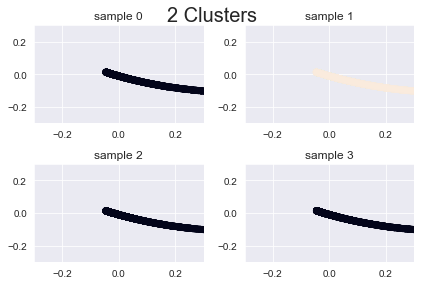

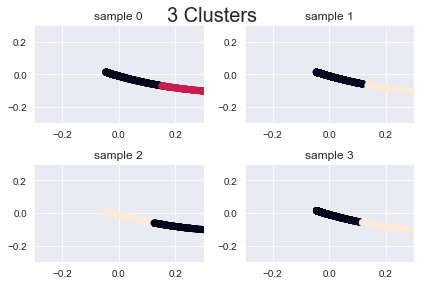

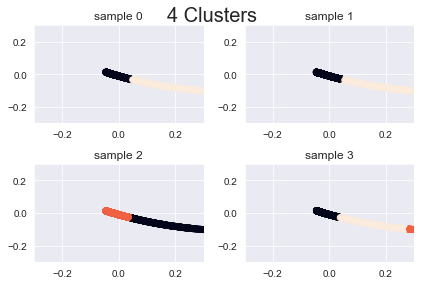

In [617]:
# For each  number of clusters, plot the clusters using the
# pca features for each sample.
for cluster in range(2, 5):
    
    # Make a grid of subplots.
    f, axarr = plt.subplots(2, 2)
    
    # Make a plot for each sample.
    for i in range(4):
        
        # PCA-created features.
        x_sub = ypred['pca_f1_sample{}'.format(i)]
        y_sub = ypred['pca_f2_sample{}'.format(i)]
        
        # Cluster assignments.
        c = ypred['clust{}_sample{}'.format(cluster, i)]
        
        # Assign the subplot to its place on the grid.
        rows = int(np.floor(i / 2))
        cols = i % 2
        axarr[rows, cols].scatter(x_sub, y_sub, c=c)
        axarr[rows, cols].set_title('sample {}'.format(i))
        axarr[rows, cols].set_xlim([-.3, .3])
        axarr[rows, cols].set_ylim([-.3, .3])
    
    # Space out the plots so that the headings don't overlap axis values.
    plt.suptitle('{} Clusters'.format(cluster), fontsize=20)
    plt.tight_layout()
    plt.show()
    print('\n')

In [625]:
# Initialize data frames
ypred = pd.DataFrame()
score = pd.DataFrame(columns=['cluster_pred','sil_score'])

# Keep track of counts of the models and use data from the different folds
for counter, data in enumerate([
    (X1, X_pca1),
    (X2, X_pca2),
    (X3, X_pca3),
    (X4, X_pca4)]):
    
    # Put the features into ypred.
    ypred['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    ypred['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]
    
    # Creating a list of possible number of clusters to test in kmeans.
    for nclust in range(2, 5):
       
        # Instantiating and fit_predicting model to then add to data frame
        kmeans = KMeans(n_clusters=nclust, random_state=42)
        pred = kmeans.fit_predict(data[0])
        ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred
        
        # Calculating silhouette scores for the data and adding that to the shilouette score
        labels = kmeans.labels_
        sscore = metrics.silhouette_score(data[0], labels, metric='euclidean')
        score = score.append({'cluster_pred':'clust' + str(nclust) + '_sample' + str(counter), 
                              'silhouette_score':sscore}, ignore_index=True)

In [626]:
# Sorting sihoilette scores
score.sort_values(by='silhouette_score', ascending=False)

,cluster_pred,sil_score,silhouette_score
0,clust2_sample0,NaN,0.934362
3,clust2_sample1,NaN,0.931383
9,clust2_sample3,NaN,0.931211
6,clust2_sample2,NaN,0.929595
1,clust3_sample0,NaN,0.889983
7,clust3_sample2,NaN,0.879663
4,clust3_sample1,NaN,0.878574
10,clust3_sample3,NaN,0.874949
2,clust4_sample0,NaN,0.835711
8,clust4_sample2,NaN,0.828978


2 clusters received the highest score

In [711]:
# checking the number of rows at each sample adn check if they are equal
print(len(X1), len(X_pca1))
print(len(X2), len(X_pca2))
print(len(X3), len(X_pca3))
print(len(X4), len(X_pca4))

7996 7996
7996 7996
7996 7996
7996 7996


## Mean-shift

In [621]:
# Initialize new data frames
ypred_ms = pd.DataFrame()
score_ms = pd.DataFrame(columns=['cluster_pred','mean_shift', 'quantile'])

# Keep track of counts of the models and use data from the different folds
for counter, data in enumerate([X1, X2, X3, X4]):
    # Creating a list of possible quantiles to test in mean shift.
    for n in [0.1, 0.2, 0.3, 0.4]:
        # Estimating number of clusters for data
        bandwidth = estimate_bandwidth(data, quantile=n, n_samples=500)
        # Ensuring all sets are the same lenght
        data = data[:7996][:]
        # Instantiating and fit_predicting model to then add to data frame
        ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
        pred = ms.fit_predict(data)
        labels = ms.labels_
        cntrs = len(np.unique(labels))
        ypred_ms['clust' + str(cntrs) + '_sample' + str(counter)] = pred
        # Calculating silhouette scores for the data and adding that to the shilouette score
        sscore = metrics.silhouette_score(data, labels, metric='euclidean')
        score_ms = score_ms.append({'cluster_pred':'clust' + str(cntrs) + '_sample' + str(counter), 
                              'silhouette_score':sscore, 'quantile':n}, ignore_index=True) 

In [622]:
score_ms.sort_values(by='silhouette_score', ascending=False)

,cluster_pred,mean_shift,quantile,silhouette_score
2,clust11_sample0,NaN,0.3,0.866717
11,clust14_sample2,NaN,0.4,0.862881
10,clust14_sample2,NaN,0.3,0.859212
6,clust20_sample1,NaN,0.3,0.852846
7,clust18_sample1,NaN,0.4,0.852039
15,clust12_sample3,NaN,0.4,0.849508
1,clust15_sample0,NaN,0.2,0.847314
14,clust10_sample3,NaN,0.3,0.844934
3,clust12_sample0,NaN,0.4,0.844391
8,clust14_sample2,NaN,0.1,0.842857


Not bad scores but it is still less than k Means

## Spectral Clustring

In [623]:
# Initialize data frames
ypred_sc = pd.DataFrame()
score_sc = pd.DataFrame(columns=['cluster_pred','silhouette_score'])

# Keep track of counts of the models and use data from the different folds
for counter, data in enumerate([
    (X1, X_pca1),
    (X2, X_pca2),
    (X3, X_pca3),
    (X4, X_pca4)]):
    
    # Put the features into ypred.
    ypred_sc['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    ypred_sc['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]
    
    # Creating a list of possible number of clusters to test in kmeans.
    for nclust in range(2, 5):
        # Instantiating and fit_predicting model to then add to data frame
        sc = SpectralClustering(n_clusters=nclust)
        pred = sc.fit_predict(data[0])
        ypred_sc['clust' + str(nclust) + '_sample' + str(counter)] = pred
        # Calculating silhouette scores for the data and adding that to the shilouette score
        labels = sc.labels_
        sscore_sc = metrics.silhouette_score(data[0], labels, metric='euclidean')
        score_sc = score_sc.append({'cluster_pred':'clust' + str(nclust) + '_sample' + str(counter), 
                              'silhouette_score':sscore_sc}, ignore_index=True)

In [714]:
score_sc.sort_values(by='silhouette_score', ascending=False)

,cluster_pred,silhouette_score
0,clust2_sample0,0.941304
6,clust2_sample2,0.940318
3,clust2_sample1,0.939516
9,clust2_sample3,0.938652
1,clust3_sample0,0.906874
4,clust3_sample1,0.906597
7,clust3_sample2,0.903025
10,clust3_sample3,0.901509
8,clust4_sample2,0.838512
2,clust4_sample0,0.833644


Again 2 clusters is the one received the highest score. these results are slightly better than k Means

## Affinity Propagation

In [627]:
# Initialize data frames
ypred = pd.DataFrame()
score_af = pd.DataFrame(columns=['cluster_pred','AF'])

# Keep track of counts of the models and use data from the different folds
for counter, data in enumerate([X1, X2, X3, X4]):
    # Ensuring all sets are the same lenght
    data = data[:7996][:]
    # Instantiating and fit_predicting model to then add to data frame
    af = AffinityPropagation().fit(data)
    cluster_centers_indices = af.cluster_centers_indices_
    n_clusters_ = len(cluster_centers_indices)
    #pred = af.fit_predict(data)
    #ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred
    # Calculating silhouette scores for the data and adding that to the shilouette score
    labels = af.labels_
    sscore_af = metrics.silhouette_score(data, labels, metric='euclidean')
    score_af = score_af.append({'cluster_pred':'clust' + str(n_clusters_) + '_sample' + str(counter), 
                              'AF':sscore_af}, ignore_index=True)

In [628]:
score_af.sort_values(by='AF', ascending=False)

,cluster_pred,AF
0,clust645_sample0,0.203513
3,clust640_sample3,0.193641
1,clust2008_sample1,0.159304
2,clust2859_sample2,0.097139


Very low scores and high number of clusters. Not a good solution

## Selected Model

The 2 cluster solution has the highest Silhouette scores. The Spectral Clustring model generated the highest Silhouette score with a value at 0.94, but the computation of this model takes long time and it is not far better than K Means (0.93). Therefore, the runners of the Boston marathon can be classified into 2 groups uaing k Means.

In [721]:
# Calculate predicted values.
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_norm)

In [718]:
y = pd.DataFrame(y_pred)
y.columns = ['cluster']

In [ ]:
combined = X.join(y, how='inner')
combined.head()

In [690]:
cluster_0 = combined.loc[(combined['cluster'] == 0)]
cluster_1 = combined.loc[(combined['cluster'] == 1)]

In [719]:
len(cluster_0)

31280

In [692]:
len(cluster_1)

704

It looks like the model generated one large group representing most of the runners in the marathon, and a small group of runners who are different from the majority. Below, we will discover what is special about this small group?

### Age

In [693]:
combined['age'].describe()

count    31984.000000
mean        42.407079
std         11.316496
min         18.000000
25%         33.000000
50%         42.000000
75%         50.000000
max         81.000000
Name: age, dtype: float64

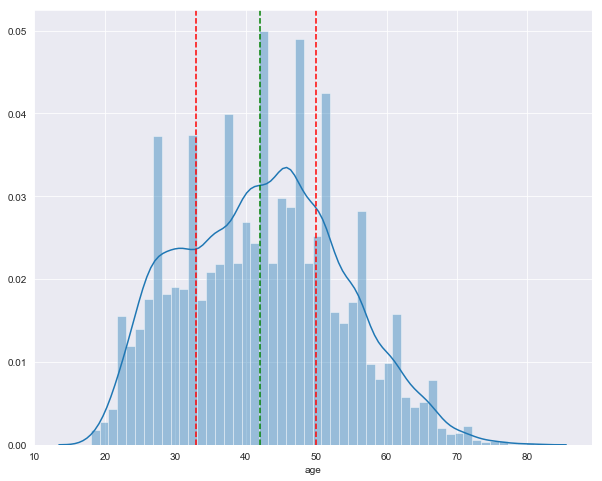

In [695]:
plt.figure(figsize=(10,8))
sns.distplot(combined['age'])
plt.axvline(33, 0 ,1, color = 'red', linestyle = 'dashed')
plt.axvline(50, 0 ,1, color = 'red', linestyle = 'dashed')
plt.axvline(42, 0 ,1, color = 'green', linestyle = 'dashed')

The average age of the marathon participants is 42 years old. The interquartile range is between 33 and 50 years old, which means approximatley 50% of the runners are between 33 and 50 years old. The number of runners younger than 33 years old are almost equal to the runners with age more than 50 years old. This indicate that most of the participant in the marathon are middle age people. It looks like younger people are less intereted in the marathon and looking for competition with more challenges.

The ditribution of runners age is very close to be symetric 

In [700]:
male = combined.loc[(combined['gender'] == 1)]
female = combined.loc[(combined['gender'] == 0)]

In [698]:
male['age'].describe()

count    17617.000000
mean        44.540898
std         11.497929
min         18.000000
25%         36.000000
50%         45.000000
75%         53.000000
max         81.000000
Name: age, dtype: float64

In [699]:
female['age'].describe()

count    14367.000000
mean        39.790562
std         10.515042
min         18.000000
25%         31.000000
50%         40.000000
75%         47.000000
max         81.000000
Name: age, dtype: float64

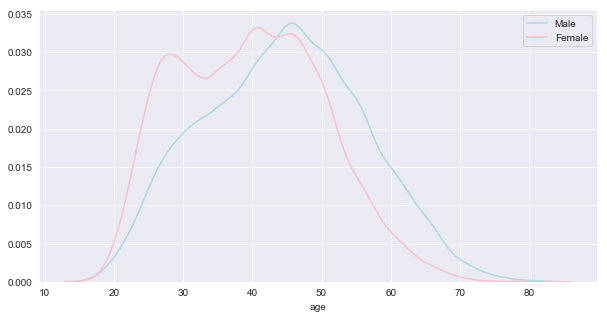

In [697]:
plt.figure(figsize = (10,5))
sns.distplot(male.age, color = 'lightblue', hist = False, label="Male")
sns.distplot(female.age, color = 'pink', hist = False, label="Female") 

The percentage of young female participants in the marathon to the total female participants are higher to the same raio for males. This indicates that young females are more interested in the marathon compare to the young males, and old males are participating more than old females

In [666]:
cluster_0['age'].describe()

count    31280.000000
mean        42.631010
std         11.288229
min         18.000000
25%         34.000000
50%         43.000000
75%         51.000000
max         81.000000
Name: age, dtype: float64

In [667]:
cluster_1['age'].describe()

count    704.000000
mean      32.457386
std        7.436858
min       18.000000
25%       27.000000
50%       31.000000
75%       37.000000
max       59.000000
Name: age, dtype: float64

Text(0.5, 1.0, 'Cluster 1')

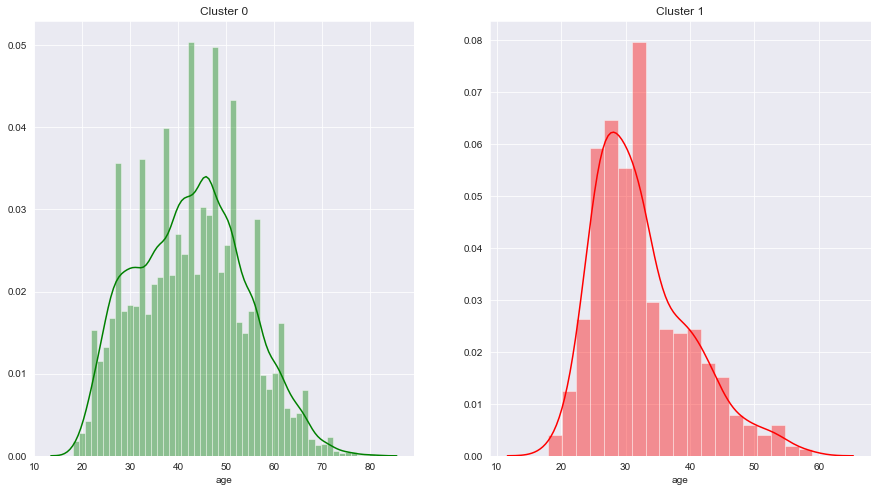

In [703]:
plt.figure(figsize=(15,8))
plt.subplot(1, 2, 1)
sns.distplot(cluster_0['age'], label="Cluster_0", color = 'green')
plt.title("Cluster 0")

plt.subplot(1, 2, 2)
sns.distplot(cluster_1['age'], label="Cluster_1", color = 'red')
plt.title("Cluster 1")

the small group runners are younger in average (32 years) compare to the big group (43 years). The older runner in the small group has an age of 59. teh small group distribution is skewed to the right, which means that most of the runners are young withy few relatively old runners outliers

### Gender

In [673]:
combined['gender'].describe()

count    31984.000000
mean         0.550807
std          0.497420
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: gender, dtype: float64

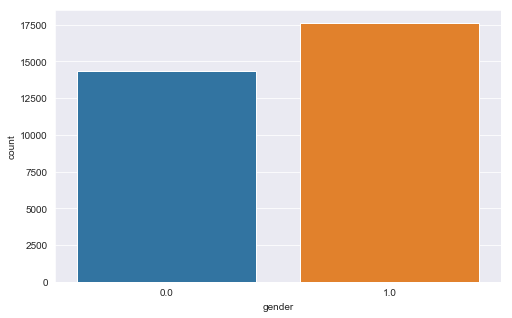

In [669]:
plt.figure(figsize=(8,5))
sns.countplot(combined['gender'])

Aproximatley 55% of the runners are male.

In [674]:
cluster_0['gender'].describe()

count    31280.000000
mean         0.542231
std          0.498221
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: gender, dtype: float64

In [675]:
cluster_1['gender'].describe()

count    704.000000
mean       0.931818
std        0.252237
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: gender, dtype: float64

Text(0.5, 1.0, 'Cluster 1')

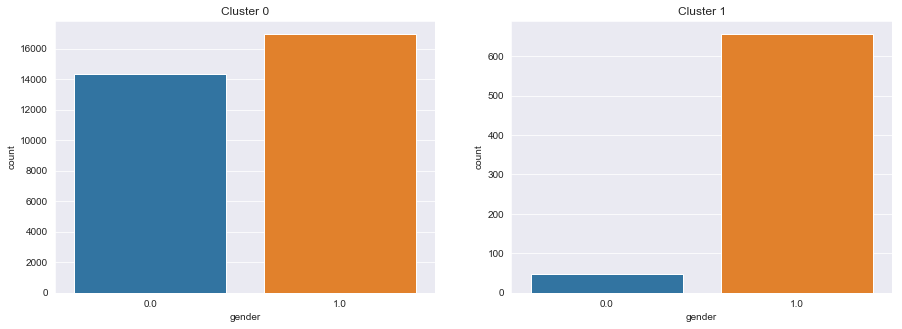

In [672]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.countplot(cluster_0['gender'], label="Cluster_0")
plt.title("Cluster 0")

plt.subplot(1, 2, 2)
sns.countplot(cluster_1['gender'], label="Cluster_1")
plt.title("Cluster 1")


The small group is dominated by males (93%), while the big group is balanced between genders, males represent 54% of the big group runners

### Official Finish Time

In [678]:
combined['official'].describe()

count    31984.000000
mean       242.997314
std         52.300431
min         80.600000
25%        205.527500
50%        232.370000
75%        273.235000
max        538.880000
Name: official, dtype: float64

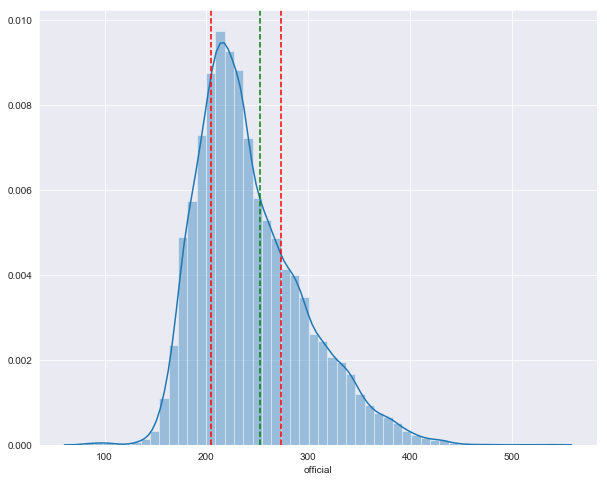

In [704]:
plt.figure(figsize=(10,8))
sns.distplot(combined['official'])
plt.axvline(205, 0 ,1, color = 'red', linestyle = 'dashed')
plt.axvline(273, 0 ,1, color = 'red', linestyle = 'dashed')
plt.axvline(253, 0 ,1, color = 'green', linestyle = 'dashed')

In average, the finish time of the runners in the marathon is 243 minutes. The distribution of runners finish time is skewed to the right, which means there is more outliers finishing the marathon late than outliers finishing it early.

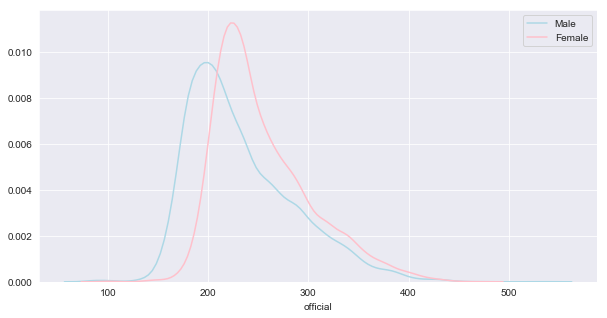

In [706]:
plt.figure(figsize = (10,5))
sns.distplot(male.official, color = 'lightblue', hist = False, label="Male")
sns.distplot(female.official, color = 'pink', hist = False, label="Female") 

It looks like the percentage of males who finish the marathon earlier to the total male runners is higher to the same ratio for females. It looks like in average males are perofrming better in the marathon than females.

In [679]:
cluster_0['official'].describe()

count    31280.000000
mean       245.004510
std         51.063304
min        165.800000
25%        207.320000
50%        233.600000
75%        274.630000
max        538.880000
Name: official, dtype: float64

In [680]:
cluster_1['official'].describe()

count    704.000000
mean     153.813977
std       16.868825
min       80.600000
25%      152.622500
50%      159.125000
75%      163.205000
max      191.330000
Name: official, dtype: float64

Text(0.5, 1.0, 'Cluster 1')

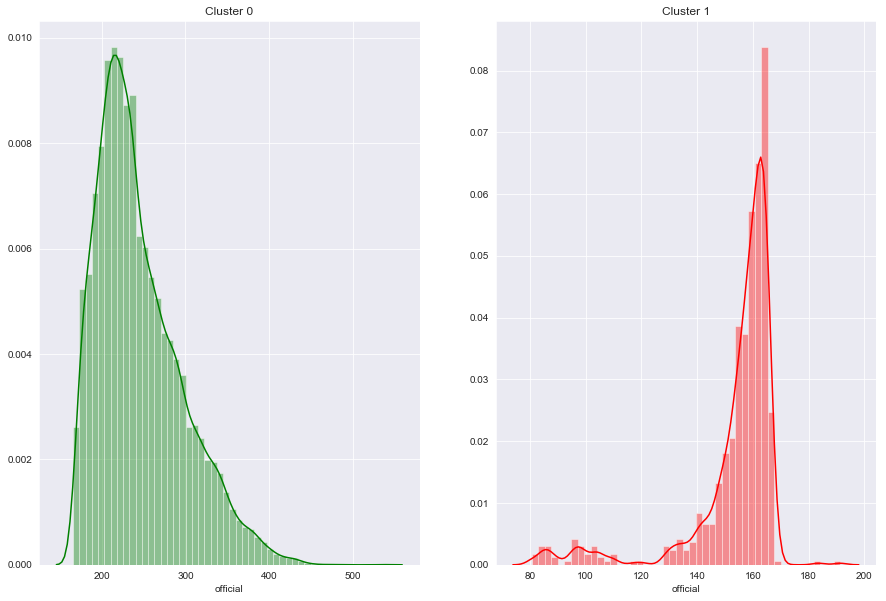

In [684]:
plt.figure(figsize=(15,10))
plt.subplot(1, 2, 1)
sns.distplot(cluster_0['official'], label="Cluster_0", color = 'green')
plt.title("Cluster 0")

plt.subplot(1, 2, 2)
sns.distplot(cluster_1['official'], label="Cluster_1", color = 'red')
plt.title("Cluster 1")


The small group runners finish the marathon faster (average finish time = 154 minutes) than the big group (average finish time = 245 minutes). it is a gap of more than 1 hour and a half in average between the 2 groups.

## Conculsion

The runners in the marathon are divided into 2 groups.one of the groups is big group and representing 31,280 runners (98% of the runners), while the other group is small and representing 704 runners (2% of the runners).

The small group is dominated by males (93%), younger (average age = 32 years old), and faster (they finish the race faster by more than 1 hour and 30 minutes in average compare to the other group). This small group represents the faster runners which most proberly the winner is going be one of them.